In [17]:
import numpy as np
import pandas as pd


import pandas as pd
import numpy as np

# Crear un DataFrame con 5000 filas
np.random.seed(42)  # Para reproducibilidad

# Generar valores para horas de estudio (por ejemplo, entre 1 y 10 horas)
horas_estudio = np.random.uniform(1, 10,5000)

# Generar las notas de forma lineal en función de las horas de estudio
# Asumimos que por cada hora de estudio se incrementa la nota de forma lineal (de 0 a 10)
notas = (horas_estudio / 100) * 60  # Esto genera notas lineales entre 0 y 10

# Crear el DataFrame
df_estudio = pd.DataFrame({
    'horas_estudio': horas_estudio,
    'notas': notas
})

# Ver las primeras filas del DataFrame
df_estudio.to_csv("notas.csv" , index=False)


In [18]:
import numpy as np

# Reemplazar 300 filas con valores aleatorios en la columna 'notas'
indices_aleatorios = np.random.choice(df_estudio.index, size=300, replace=False)
valores_aleatorios = np.random.uniform(0, 10, size=300)  # Valores aleatorios entre 0 y 10

# Asignamos los valores aleatorios a las filas seleccionadas
df_estudio.loc[indices_aleatorios, 'notas'] = valores_aleatorios

# Ver las primeras filas del DataFrame actualizado
print(df_estudio.head())

# Guardar en un archivo CSV si es necesario
df_estudio.to_csv("notas_actualizadas.csv", index=False)


   horas_estudio     notas
0       4.370861  2.622517
1       9.556429  6.571977
2       7.587945  4.552767
3       6.387926  3.832756
4       2.404168  1.442501


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X= df_estudio[["horas_estudio"]]
y= df_estudio["notas"]

# Suponiendo que tenemos un DataFrame con X (variables) e y (target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#print("Datos de entrenamiento:", len(X_train))
#print("Datos de prueba:", len(X_test))



modelo = LinearRegression()    # Definir el modelo
modelo.fit(X_train, y_train)   # Entrenar el modelo
predicciones = modelo.predict(X_test)  # Hacer predicciones

mse = mean_squared_error(y_test, predicciones)  # Error cuadrático medio
r2 = r2_score(y_test, predicciones)  # Coeficiente de determinación

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)



Error cuadrático medio (MSE): 0.7809206699660777
Coeficiente de determinación (R^2): 0.7239978146037167


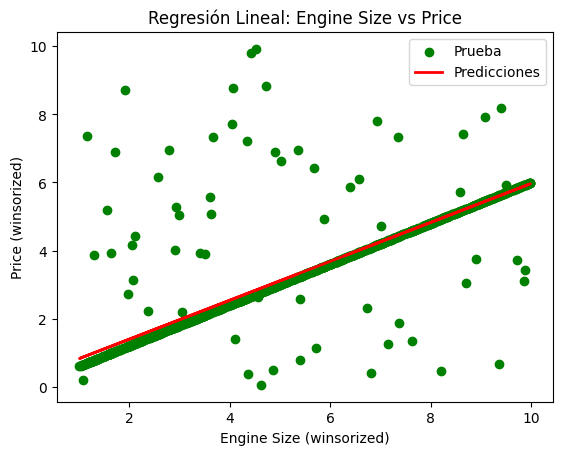

In [20]:

import matplotlib.pyplot as plt

""" # Crear un mapa de dispersión para los datos de entrenamiento
plt.scatter(X_train, y_train, color='blue', label='Entrenamiento') """

# Crear un mapa de dispersión para los datos de prueba
plt.scatter(X_test, y_test, color='green', label='Prueba')

# Crear la línea de predicción
plt.plot(X_test, predicciones, color='red', linewidth=2, label='Predicciones')

# Añadir etiquetas y título
plt.xlabel("Engine Size (winsorized)")
plt.ylabel("Price (winsorized)")
plt.title("Regresión Lineal: Engine Size vs Price")

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
